<h1>Data Preprocessing</h1>

<p>Convert raw dataset into a clean dataset for analysis</p>

In [1]:
import pandas as pd
import matplotlib
import re
import nltk

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from dateutil.parser import parse
pd.options.mode.chained_assignment = None
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

True

In [2]:
df = pd.read_csv('../result.csv').dropna()
df

,platform,about,date,body
0,Twitter,adidas,2021-12-30 18:38:04+00:00,adidas Yeezy Boost 350 V2 “Dazzling Blue” 👟\n\...
1,Twitter,adidas,2021-12-30 17:43:37+00:00,Am over the worst of Omicron. Alhumdullilah. I...
2,Twitter,adidas,2021-12-30 06:28:19+00:00,🎁 I'm blessing 1 follower with life changing N...
3,Twitter,adidas,2021-12-29 22:31:57+00:00,South Park and adidas have a new “Professor Ch...
4,Twitter,adidas,2021-12-29 19:29:20+00:00,"Please patronise me, I sell Adidas shoes for 1..."
...,...,...,...,...
19050,HardwareZone,Factory Outlets in Hong Kong,2008-11-06 10:10:26+00:00,"Just went Citygate,\n\nThe place is very conve..."
19051,HardwareZone,Factory Outlets in Hong Kong,2008-11-06 15:44:39+00:00,"juice14 said:\nJust went Citygate,\n\nThe plac..."
19052,HardwareZone,Factory Outlets in Hong Kong,2008-11-10 13:27:38+00:00,"abutan said:\nHi,\n\nHow do you get to CityGat..."
19053,HardwareZone,Factory Outlets in Hong Kong,2008-11-10 13:45:35+00:00,Citygate is at Tung Chung MTR.... Is the end o...


<AxesSubplot:title={'center':'Platforms'}, ylabel='None'>

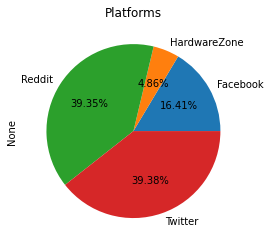

In [3]:
df.groupby('platform').size().plot(kind='pie',  autopct='%1.2f%%', title='Platforms')

<h2>Tokenization</h2>

In [4]:
df['token_words'] = df['body'].str.split()
df

,platform,about,date,body,token_words
0,Twitter,adidas,2021-12-30 18:38:04+00:00,adidas Yeezy Boost 350 V2 “Dazzling Blue” 👟\n\...,"[adidas, Yeezy, Boost, 350, V2, “Dazzling, Blu..."
1,Twitter,adidas,2021-12-30 17:43:37+00:00,Am over the worst of Omicron. Alhumdullilah. I...,"[Am, over, the, worst, of, Omicron., Alhumdull..."
2,Twitter,adidas,2021-12-30 06:28:19+00:00,🎁 I'm blessing 1 follower with life changing N...,"[🎁, I'm, blessing, 1, follower, with, life, ch..."
3,Twitter,adidas,2021-12-29 22:31:57+00:00,South Park and adidas have a new “Professor Ch...,"[South, Park, and, adidas, have, a, new, “Prof..."
4,Twitter,adidas,2021-12-29 19:29:20+00:00,"Please patronise me, I sell Adidas shoes for 1...","[Please, patronise, me,, I, sell, Adidas, shoe..."
...,...,...,...,...,...
19050,HardwareZone,Factory Outlets in Hong Kong,2008-11-06 10:10:26+00:00,"Just went Citygate,\n\nThe place is very conve...","[Just, went, Citygate,, The, place, is, very, ..."
19051,HardwareZone,Factory Outlets in Hong Kong,2008-11-06 15:44:39+00:00,"juice14 said:\nJust went Citygate,\n\nThe plac...","[juice14, said:, Just, went, Citygate,, The, p..."
19052,HardwareZone,Factory Outlets in Hong Kong,2008-11-10 13:27:38+00:00,"abutan said:\nHi,\n\nHow do you get to CityGat...","[abutan, said:, Hi,, How, do, you, get, to, Ci..."
19053,HardwareZone,Factory Outlets in Hong Kong,2008-11-10 13:45:35+00:00,Citygate is at Tung Chung MTR.... Is the end o...,"[Citygate, is, at, Tung, Chung, MTR...., Is, t..."


<h2>Normalize date and clean text</h2>

In [5]:
df['date'] = list(map(lambda x: parse(str(x)).strftime("%d-%m-%Y %H:%M:%S"), df['date']))

In [6]:
def clean(body):
    processed = []
    try:
        for i in body:
            i = re.sub(r"(@\[A-Za-z]+)|([^A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", i)
            i = i.lower()
            processed.append(i)
        clean_words = processed[:]
        sw_file = open("../stopwords.txt", "r", encoding='utf-8')
        sw = sw_file.read().split('\n')
        sw.append('')
        for word in processed:
            if word in sw:
                clean_words.remove(word)
        return clean_words
    except:
        return []

df['token_words'] = df['token_words'].apply(clean)
df

,platform,about,date,body,token_words
0,Twitter,adidas,30-12-2021 18:38:04,adidas Yeezy Boost 350 V2 “Dazzling Blue” 👟\n\...,"[adidas, yeezy, boost, dazzling, blue, coming,..."
1,Twitter,adidas,30-12-2021 17:43:37,Am over the worst of Omicron. Alhumdullilah. I...,"[worst, omicron, alhumdullilah, cupcake, break..."
2,Twitter,adidas,30-12-2021 06:28:19,🎁 I'm blessing 1 follower with life changing N...,"[blessing, follower, life, changing, nfts, hou..."
3,Twitter,adidas,29-12-2021 22:31:57,South Park and adidas have a new “Professor Ch...,"[south, park, adidas, professor, chaos, nmd, r..."
4,Twitter,adidas,29-12-2021 19:29:20,"Please patronise me, I sell Adidas shoes for 1...","[patronise, sell, adidas, shoes, fake, walk, f..."
...,...,...,...,...,...
19050,HardwareZone,Factory Outlets in Hong Kong,06-11-2008 10:10:26,"Just went Citygate,\n\nThe place is very conve...","[citygate, place, convenient, stocks, lot, bra..."
19051,HardwareZone,Factory Outlets in Hong Kong,06-11-2008 15:44:39,"juice14 said:\nJust went Citygate,\n\nThe plac...","[juice, citygate, place, convenient, stocks, l..."
19052,HardwareZone,Factory Outlets in Hong Kong,10-11-2008 13:27:38,"abutan said:\nHi,\n\nHow do you get to CityGat...","[abutan, citygate, mtr, station, alight, happe..."
19053,HardwareZone,Factory Outlets in Hong Kong,10-11-2008 13:45:35,Citygate is at Tung Chung MTR.... Is the end o...,"[citygate, tung, chung, mtr, disneyland]"


In [7]:
words = df['token_words'].sum()
print('Total number of words: ', len(words))

Total number of words:  302723


In [8]:
def word_frequency(series_sum):
    freq = nltk.FreqDist(series_sum)
    i = 0
    total = 0
    top = []

    for key, val in freq.most_common():
        print(f'{key}: {val}')
        total += 1
        if i < 5:
            top.append(str(key))
            i += 1
    return total
            
f = word_frequency(words)

nike: 10592
adidas: 8771
shoes: 2137
air: 1281
dunk: 1256
people: 1238
good: 1091
size: 995
jersey: 943
wear: 893
time: 860
buy: 857
shoe: 841
pair: 829
yeezy: 651
money: 624
years: 623
wearing: 602
brand: 594
black: 584
day: 576
year: 568
amp: 568
jordan: 567
max: 517
company: 510
running: 492
la: 490
big: 487
reebok: 485
store: 485
lot: 471
great: 469
love: 467
high: 458
work: 456
white: 447
official: 444
bought: 437
dec: 433
subreddit: 411
brands: 401
boost: 388
sneakers: 378
companies: 370
deal: 369
products: 368
price: 364
support: 363
long: 362
game: 354
small: 352
feel: 348
nice: 344
sb: 341
pretty: 340
stocks: 339
quality: 335
bad: 334
days: 334
china: 328
today: 327
images: 327
man: 326
lol: 320
kit: 319
fit: 318
blue: 315
red: 315
app: 309
nikes: 306
team: 303
blackpink: 303
sports: 301
order: 299
stuff: 297
product: 297
free: 292
feet: 290
shirt: 285
buying: 283
sell: 281
aapl: 280
logo: 279
coming: 273
collection: 273
nft: 270
pay: 270
pairs: 270
large: 259
real: 258
bit: 2

In [9]:
print('Total number of unique strings: ', f)

Total number of unique strings:  39881


<h2>Lemmatizing</h2>

<p>The process of converting a word to its base form.</p>

In [10]:
# Part of Speech tagging: Adding a tag with a particular word defining its type (verb, noun, adjective etc)
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None
    
lemmatizer = WordNetLemmatizer()
    
words = []
pos_tag = []
for i in df['token_words']:
    pos_tagged = nltk.pos_tag(i)  
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    appendlist = []
    for word,tag in wordnet_tagged:
        if tag is None:
            words.append(lemmatizer.lemmatize(word))
            appendlist.append(lemmatizer.lemmatize(word))
        else:
            words.append(lemmatizer.lemmatize(word,tag))
            appendlist.append(lemmatizer.lemmatize(word))
    pos_tag.append(appendlist)

In [11]:
df['lemmatized'] = pos_tag
df

,platform,about,date,body,token_words,lemmatized
0,Twitter,adidas,30-12-2021 18:38:04,adidas Yeezy Boost 350 V2 “Dazzling Blue” 👟\n\...,"[adidas, yeezy, boost, dazzling, blue, coming,...","[adidas, yeezy, boost, dazzling, blue, coming,..."
1,Twitter,adidas,30-12-2021 17:43:37,Am over the worst of Omicron. Alhumdullilah. I...,"[worst, omicron, alhumdullilah, cupcake, break...","[worst, omicron, alhumdullilah, cupcake, break..."
2,Twitter,adidas,30-12-2021 06:28:19,🎁 I'm blessing 1 follower with life changing N...,"[blessing, follower, life, changing, nfts, hou...","[blessing, follower, life, changing, nfts, hou..."
3,Twitter,adidas,29-12-2021 22:31:57,South Park and adidas have a new “Professor Ch...,"[south, park, adidas, professor, chaos, nmd, r...","[south, park, adidas, professor, chaos, nmd, r..."
4,Twitter,adidas,29-12-2021 19:29:20,"Please patronise me, I sell Adidas shoes for 1...","[patronise, sell, adidas, shoes, fake, walk, f...","[patronise, sell, adidas, shoe, fake, walk, fa..."
...,...,...,...,...,...,...
19050,HardwareZone,Factory Outlets in Hong Kong,06-11-2008 10:10:26,"Just went Citygate,\n\nThe place is very conve...","[citygate, place, convenient, stocks, lot, bra...","[citygate, place, convenient, stock, lot, bran..."
19051,HardwareZone,Factory Outlets in Hong Kong,06-11-2008 15:44:39,"juice14 said:\nJust went Citygate,\n\nThe plac...","[juice, citygate, place, convenient, stocks, l...","[juice, citygate, place, convenient, stock, lo..."
19052,HardwareZone,Factory Outlets in Hong Kong,10-11-2008 13:27:38,"abutan said:\nHi,\n\nHow do you get to CityGat...","[abutan, citygate, mtr, station, alight, happe...","[abutan, citygate, mtr, station, alight, happe..."
19053,HardwareZone,Factory Outlets in Hong Kong,10-11-2008 13:45:35,Citygate is at Tung Chung MTR.... Is the end o...,"[citygate, tung, chung, mtr, disneyland]","[citygate, tung, chung, mtr, disneyland]"


In [12]:
lemmatized_sum = df['lemmatized'].sum()
f = word_frequency(lemmatized_sum)

nike: 10898
adidas: 8771
shoe: 2978
dunk: 1357
air: 1289
people: 1266
year: 1191
good: 1177
jersey: 1174
size: 1105
pair: 1099
time: 1075
brand: 995
wear: 968
day: 910
company: 904
buy: 896
product: 665
jordan: 661
yeezy: 651
store: 646
money: 624
wearing: 602
sneaker: 598
black: 592
la: 587
amp: 568
work: 563
stock: 554
lot: 543
max: 527
game: 513
love: 511
high: 497
running: 493
big: 487
reebok: 485
foot: 484
great: 472
price: 466
deal: 459
white: 453
official: 449
sport: 441
bought: 437
shirt: 434
dec: 434
kit: 418
subreddit: 411
feel: 410
boost: 407
fit: 405
month: 397
sale: 393
team: 383
image: 382
support: 380
da: 368
long: 362
order: 352
small: 352
sb: 352
china: 350
drop: 349
guy: 347
customer: 345
player: 344
nice: 344
today: 342
pretty: 340
week: 338
blue: 336
quality: 336
man: 334
bad: 334
release: 331
boot: 328
sell: 320
red: 320
lol: 320
logo: 311
point: 310
issue: 310
app: 309
life: 305
stuff: 304
blackpink: 303
free: 296
medium: 294
pay: 293
buying: 283
force: 283
item: 

In [13]:
print('Total number of unique strings: ', f)

Total number of unique strings:  37083


In [14]:
df['clean_body'] = list(map(lambda x: ' '.join(x), list(df['lemmatized'])))
df

,platform,about,date,body,token_words,lemmatized,clean_body
0,Twitter,adidas,30-12-2021 18:38:04,adidas Yeezy Boost 350 V2 “Dazzling Blue” 👟\n\...,"[adidas, yeezy, boost, dazzling, blue, coming,...","[adidas, yeezy, boost, dazzling, blue, coming,...",adidas yeezy boost dazzling blue coming yankee...
1,Twitter,adidas,30-12-2021 17:43:37,Am over the worst of Omicron. Alhumdullilah. I...,"[worst, omicron, alhumdullilah, cupcake, break...","[worst, omicron, alhumdullilah, cupcake, break...",worst omicron alhumdullilah cupcake breakfast ...
2,Twitter,adidas,30-12-2021 06:28:19,🎁 I'm blessing 1 follower with life changing N...,"[blessing, follower, life, changing, nfts, hou...","[blessing, follower, life, changing, nfts, hou...",blessing follower life changing nfts hour adid...
3,Twitter,adidas,29-12-2021 22:31:57,South Park and adidas have a new “Professor Ch...,"[south, park, adidas, professor, chaos, nmd, r...","[south, park, adidas, professor, chaos, nmd, r...",south park adidas professor chaos nmd releasing
4,Twitter,adidas,29-12-2021 19:29:20,"Please patronise me, I sell Adidas shoes for 1...","[patronise, sell, adidas, shoes, fake, walk, f...","[patronise, sell, adidas, shoe, fake, walk, fa...",patronise sell adidas shoe fake walk fast notice
...,...,...,...,...,...,...,...
19050,HardwareZone,Factory Outlets in Hong Kong,06-11-2008 10:10:26,"Just went Citygate,\n\nThe place is very conve...","[citygate, place, convenient, stocks, lot, bra...","[citygate, place, convenient, stock, lot, bran...",citygate place convenient stock lot brand reco...
19051,HardwareZone,Factory Outlets in Hong Kong,06-11-2008 15:44:39,"juice14 said:\nJust went Citygate,\n\nThe plac...","[juice, citygate, place, convenient, stocks, l...","[juice, citygate, place, convenient, stock, lo...",juice citygate place convenient stock lot bran...
19052,HardwareZone,Factory Outlets in Hong Kong,10-11-2008 13:27:38,"abutan said:\nHi,\n\nHow do you get to CityGat...","[abutan, citygate, mtr, station, alight, happe...","[abutan, citygate, mtr, station, alight, happe...",abutan citygate mtr station alight happened ni...
19053,HardwareZone,Factory Outlets in Hong Kong,10-11-2008 13:45:35,Citygate is at Tung Chung MTR.... Is the end o...,"[citygate, tung, chung, mtr, disneyland]","[citygate, tung, chung, mtr, disneyland]",citygate tung chung mtr disneyland


<h2>Labelling each row to their respective keyword(s) according to their text</h2>

In [15]:
keywords = df['about'].value_counts()[:2].index.tolist()
keywords

['adidas', 'nike']

In [16]:
def keyword(text):
    text = text.lower()
    if all([word in text for word in keywords]):
        return ' and '.join(keywords)
    elif keywords[0] in text:
        return keywords[0]
    elif keywords[1] in text:
        return keywords[1]
    else:
        return 'nil'

# Check if 'clean_body' contains any of the two keywords and label accordingly 
df['label'] = df['clean_body'].apply(keyword)
df

,platform,about,date,body,token_words,lemmatized,clean_body,label
0,Twitter,adidas,30-12-2021 18:38:04,adidas Yeezy Boost 350 V2 “Dazzling Blue” 👟\n\...,"[adidas, yeezy, boost, dazzling, blue, coming,...","[adidas, yeezy, boost, dazzling, blue, coming,...",adidas yeezy boost dazzling blue coming yankee...,adidas
1,Twitter,adidas,30-12-2021 17:43:37,Am over the worst of Omicron. Alhumdullilah. I...,"[worst, omicron, alhumdullilah, cupcake, break...","[worst, omicron, alhumdullilah, cupcake, break...",worst omicron alhumdullilah cupcake breakfast ...,adidas
2,Twitter,adidas,30-12-2021 06:28:19,🎁 I'm blessing 1 follower with life changing N...,"[blessing, follower, life, changing, nfts, hou...","[blessing, follower, life, changing, nfts, hou...",blessing follower life changing nfts hour adid...,adidas
3,Twitter,adidas,29-12-2021 22:31:57,South Park and adidas have a new “Professor Ch...,"[south, park, adidas, professor, chaos, nmd, r...","[south, park, adidas, professor, chaos, nmd, r...",south park adidas professor chaos nmd releasing,adidas
4,Twitter,adidas,29-12-2021 19:29:20,"Please patronise me, I sell Adidas shoes for 1...","[patronise, sell, adidas, shoes, fake, walk, f...","[patronise, sell, adidas, shoe, fake, walk, fa...",patronise sell adidas shoe fake walk fast notice,adidas
...,...,...,...,...,...,...,...,...
19050,HardwareZone,Factory Outlets in Hong Kong,06-11-2008 10:10:26,"Just went Citygate,\n\nThe place is very conve...","[citygate, place, convenient, stocks, lot, bra...","[citygate, place, convenient, stock, lot, bran...",citygate place convenient stock lot brand reco...,nil
19051,HardwareZone,Factory Outlets in Hong Kong,06-11-2008 15:44:39,"juice14 said:\nJust went Citygate,\n\nThe plac...","[juice, citygate, place, convenient, stocks, l...","[juice, citygate, place, convenient, stock, lo...",juice citygate place convenient stock lot bran...,nil
19052,HardwareZone,Factory Outlets in Hong Kong,10-11-2008 13:27:38,"abutan said:\nHi,\n\nHow do you get to CityGat...","[abutan, citygate, mtr, station, alight, happe...","[abutan, citygate, mtr, station, alight, happe...",abutan citygate mtr station alight happened ni...,nike
19053,HardwareZone,Factory Outlets in Hong Kong,10-11-2008 13:45:35,Citygate is at Tung Chung MTR.... Is the end o...,"[citygate, tung, chung, mtr, disneyland]","[citygate, tung, chung, mtr, disneyland]",citygate tung chung mtr disneyland,nil


In [17]:
# Using 'about' column instead if 'clean_body' contains none of the keywords
df.loc[df['label'] == 'nil', 'label'] = df['about'].apply(keyword)
df

,platform,about,date,body,token_words,lemmatized,clean_body,label
0,Twitter,adidas,30-12-2021 18:38:04,adidas Yeezy Boost 350 V2 “Dazzling Blue” 👟\n\...,"[adidas, yeezy, boost, dazzling, blue, coming,...","[adidas, yeezy, boost, dazzling, blue, coming,...",adidas yeezy boost dazzling blue coming yankee...,adidas
1,Twitter,adidas,30-12-2021 17:43:37,Am over the worst of Omicron. Alhumdullilah. I...,"[worst, omicron, alhumdullilah, cupcake, break...","[worst, omicron, alhumdullilah, cupcake, break...",worst omicron alhumdullilah cupcake breakfast ...,adidas
2,Twitter,adidas,30-12-2021 06:28:19,🎁 I'm blessing 1 follower with life changing N...,"[blessing, follower, life, changing, nfts, hou...","[blessing, follower, life, changing, nfts, hou...",blessing follower life changing nfts hour adid...,adidas
3,Twitter,adidas,29-12-2021 22:31:57,South Park and adidas have a new “Professor Ch...,"[south, park, adidas, professor, chaos, nmd, r...","[south, park, adidas, professor, chaos, nmd, r...",south park adidas professor chaos nmd releasing,adidas
4,Twitter,adidas,29-12-2021 19:29:20,"Please patronise me, I sell Adidas shoes for 1...","[patronise, sell, adidas, shoes, fake, walk, f...","[patronise, sell, adidas, shoe, fake, walk, fa...",patronise sell adidas shoe fake walk fast notice,adidas
...,...,...,...,...,...,...,...,...
19050,HardwareZone,Factory Outlets in Hong Kong,06-11-2008 10:10:26,"Just went Citygate,\n\nThe place is very conve...","[citygate, place, convenient, stocks, lot, bra...","[citygate, place, convenient, stock, lot, bran...",citygate place convenient stock lot brand reco...,nil
19051,HardwareZone,Factory Outlets in Hong Kong,06-11-2008 15:44:39,"juice14 said:\nJust went Citygate,\n\nThe plac...","[juice, citygate, place, convenient, stocks, l...","[juice, citygate, place, convenient, stock, lo...",juice citygate place convenient stock lot bran...,nil
19052,HardwareZone,Factory Outlets in Hong Kong,10-11-2008 13:27:38,"abutan said:\nHi,\n\nHow do you get to CityGat...","[abutan, citygate, mtr, station, alight, happe...","[abutan, citygate, mtr, station, alight, happe...",abutan citygate mtr station alight happened ni...,nike
19053,HardwareZone,Factory Outlets in Hong Kong,10-11-2008 13:45:35,Citygate is at Tung Chung MTR.... Is the end o...,"[citygate, tung, chung, mtr, disneyland]","[citygate, tung, chung, mtr, disneyland]",citygate tung chung mtr disneyland,nil


<AxesSubplot:title={'center':'Labelled'}, ylabel='None'>

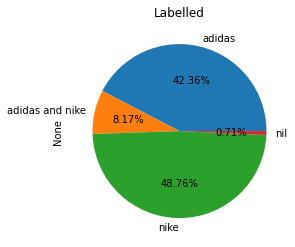

In [18]:
df.groupby('label').size().plot(kind='pie',  autopct='%1.2f%%', title='Labelled')

In [19]:
df.drop('about', axis=1, inplace=True)

# Remove nil
df = df[df['label'] != 'nil']
df

,platform,date,body,token_words,lemmatized,clean_body,label
0,Twitter,30-12-2021 18:38:04,adidas Yeezy Boost 350 V2 “Dazzling Blue” 👟\n\...,"[adidas, yeezy, boost, dazzling, blue, coming,...","[adidas, yeezy, boost, dazzling, blue, coming,...",adidas yeezy boost dazzling blue coming yankee...,adidas
1,Twitter,30-12-2021 17:43:37,Am over the worst of Omicron. Alhumdullilah. I...,"[worst, omicron, alhumdullilah, cupcake, break...","[worst, omicron, alhumdullilah, cupcake, break...",worst omicron alhumdullilah cupcake breakfast ...,adidas
2,Twitter,30-12-2021 06:28:19,🎁 I'm blessing 1 follower with life changing N...,"[blessing, follower, life, changing, nfts, hou...","[blessing, follower, life, changing, nfts, hou...",blessing follower life changing nfts hour adid...,adidas
3,Twitter,29-12-2021 22:31:57,South Park and adidas have a new “Professor Ch...,"[south, park, adidas, professor, chaos, nmd, r...","[south, park, adidas, professor, chaos, nmd, r...",south park adidas professor chaos nmd releasing,adidas
4,Twitter,29-12-2021 19:29:20,"Please patronise me, I sell Adidas shoes for 1...","[patronise, sell, adidas, shoes, fake, walk, f...","[patronise, sell, adidas, shoe, fake, walk, fa...",patronise sell adidas shoe fake walk fast notice,adidas
...,...,...,...,...,...,...,...
19038,HardwareZone,20-08-2008 01:52:51,jus came back from hk.\n\n\nAdidas Factory out...,"[jus, hk, adidas, factory, outlet, location, b...","[jus, hk, adidas, factory, outlet, location, b...",jus hk adidas factory outlet location block ho...,adidas
19039,HardwareZone,24-08-2008 15:03:34,Me and hubby like Citygate leh. Polo Ralph Pol...,"[hubby, citygate, leh, polo, ralph, polo, tees...","[hubby, citygate, leh, polo, ralph, polo, tee,...",hubby citygate leh polo ralph polo tee pretty ...,adidas and nike
19045,HardwareZone,11-10-2008 04:19:53,"helpp!\n\nOkay, I am from Toronto & I'm going ...","[helpp, toronto, hong, kong, december, long, w...","[helpp, toronto, hong, kong, december, long, w...",helpp toronto hong kong december long wanna sh...,nike
19048,HardwareZone,30-10-2008 17:28:01,hihi... sorry all just wanna ask.. so the post...,"[hihi, wanna, post, guide, monkey, post, nike,...","[hihi, wanna, post, guide, monkey, post, nike,...",hihi wanna post guide monkey post nike addidas...,nike


<h2>Removing the two keywords from 'clean_body' since it doesn't provide insight</h2>

In [20]:
keywords

['adidas', 'nike']

In [21]:
def remove_keywords(text):
    text = text.replace(keywords[0], '')
    text = text.replace(keywords[1], '')
    return text.strip()

df['clean_body'] = df['clean_body'].apply(remove_keywords)
df

,platform,date,body,token_words,lemmatized,clean_body,label
0,Twitter,30-12-2021 18:38:04,adidas Yeezy Boost 350 V2 “Dazzling Blue” 👟\n\...,"[adidas, yeezy, boost, dazzling, blue, coming,...","[adidas, yeezy, boost, dazzling, blue, coming,...",yeezy boost dazzling blue coming yankeekicks ig,adidas
1,Twitter,30-12-2021 17:43:37,Am over the worst of Omicron. Alhumdullilah. I...,"[worst, omicron, alhumdullilah, cupcake, break...","[worst, omicron, alhumdullilah, cupcake, break...",worst omicron alhumdullilah cupcake breakfast ...,adidas
2,Twitter,30-12-2021 06:28:19,🎁 I'm blessing 1 follower with life changing N...,"[blessing, follower, life, changing, nfts, hou...","[blessing, follower, life, changing, nfts, hou...",blessing follower life changing nfts hour orig...,adidas
3,Twitter,29-12-2021 22:31:57,South Park and adidas have a new “Professor Ch...,"[south, park, adidas, professor, chaos, nmd, r...","[south, park, adidas, professor, chaos, nmd, r...",south park professor chaos nmd releasing,adidas
4,Twitter,29-12-2021 19:29:20,"Please patronise me, I sell Adidas shoes for 1...","[patronise, sell, adidas, shoes, fake, walk, f...","[patronise, sell, adidas, shoe, fake, walk, fa...",patronise sell shoe fake walk fast notice,adidas
...,...,...,...,...,...,...,...
19038,HardwareZone,20-08-2008 01:52:51,jus came back from hk.\n\n\nAdidas Factory out...,"[jus, hk, adidas, factory, outlet, location, b...","[jus, hk, adidas, factory, outlet, location, b...",jus hk factory outlet location block hong kon...,adidas
19039,HardwareZone,24-08-2008 15:03:34,Me and hubby like Citygate leh. Polo Ralph Pol...,"[hubby, citygate, leh, polo, ralph, polo, tees...","[hubby, citygate, leh, polo, ralph, polo, tee,...",hubby citygate leh polo ralph polo tee pretty ...,adidas and nike
19045,HardwareZone,11-10-2008 04:19:53,"helpp!\n\nOkay, I am from Toronto & I'm going ...","[helpp, toronto, hong, kong, december, long, w...","[helpp, toronto, hong, kong, december, long, w...",helpp toronto hong kong december long wanna sh...,nike
19048,HardwareZone,30-10-2008 17:28:01,hihi... sorry all just wanna ask.. so the post...,"[hihi, wanna, post, guide, monkey, post, nike,...","[hihi, wanna, post, guide, monkey, post, nike,...",hihi wanna post guide monkey post addidas shi...,nike


In [22]:
clean_body_sum = df['clean_body'].str.split().sum()
f = word_frequency(clean_body_sum)

shoe: 2959
dunk: 1357
air: 1289
people: 1262
year: 1184
jersey: 1172
good: 1158
size: 1098
pair: 1093
time: 1070
brand: 986
wear: 964
company: 904
day: 901
buy: 885
jordan: 671
product: 665
yeezy: 654
store: 643
money: 621
wearing: 605
sneaker: 594
black: 591
la: 588
amp: 568
work: 562
stock: 549
lot: 537
max: 526
game: 512
love: 508
high: 496
running: 495
reebok: 485
big: 484
foot: 478
great: 471
price: 464
deal: 452
official: 451
white: 449
sport: 435
shirt: 434
bought: 433
dec: 432
kit: 415
subreddit: 411
feel: 408
boost: 407
fit: 403
month: 397
team: 391
sale: 386
image: 382
support: 380
da: 368
long: 355
sb: 353
small: 352
order: 350
drop: 349
china: 348
guy: 345
customer: 345
today: 342
nice: 339
week: 337
player: 337
pretty: 337
blue: 336
quality: 335
man: 333
bad: 332
release: 331
sell: 319
red: 319
lol: 318
boot: 317
issue: 310
point: 309
logo: 308
app: 306
life: 305
blackpink: 303
stuff: 301
free: 295
medium: 294
pay: 291
buying: 283
force: 283
item: 281
aapl: 280
collection:

In [23]:
print('Total number of unique strings: ', f)

Total number of unique strings:  36749


In [24]:
df = df[df['clean_body'] != '']
df

,platform,date,body,token_words,lemmatized,clean_body,label
0,Twitter,30-12-2021 18:38:04,adidas Yeezy Boost 350 V2 “Dazzling Blue” 👟\n\...,"[adidas, yeezy, boost, dazzling, blue, coming,...","[adidas, yeezy, boost, dazzling, blue, coming,...",yeezy boost dazzling blue coming yankeekicks ig,adidas
1,Twitter,30-12-2021 17:43:37,Am over the worst of Omicron. Alhumdullilah. I...,"[worst, omicron, alhumdullilah, cupcake, break...","[worst, omicron, alhumdullilah, cupcake, break...",worst omicron alhumdullilah cupcake breakfast ...,adidas
2,Twitter,30-12-2021 06:28:19,🎁 I'm blessing 1 follower with life changing N...,"[blessing, follower, life, changing, nfts, hou...","[blessing, follower, life, changing, nfts, hou...",blessing follower life changing nfts hour orig...,adidas
3,Twitter,29-12-2021 22:31:57,South Park and adidas have a new “Professor Ch...,"[south, park, adidas, professor, chaos, nmd, r...","[south, park, adidas, professor, chaos, nmd, r...",south park professor chaos nmd releasing,adidas
4,Twitter,29-12-2021 19:29:20,"Please patronise me, I sell Adidas shoes for 1...","[patronise, sell, adidas, shoes, fake, walk, f...","[patronise, sell, adidas, shoe, fake, walk, fa...",patronise sell shoe fake walk fast notice,adidas
...,...,...,...,...,...,...,...
19038,HardwareZone,20-08-2008 01:52:51,jus came back from hk.\n\n\nAdidas Factory out...,"[jus, hk, adidas, factory, outlet, location, b...","[jus, hk, adidas, factory, outlet, location, b...",jus hk factory outlet location block hong kon...,adidas
19039,HardwareZone,24-08-2008 15:03:34,Me and hubby like Citygate leh. Polo Ralph Pol...,"[hubby, citygate, leh, polo, ralph, polo, tees...","[hubby, citygate, leh, polo, ralph, polo, tee,...",hubby citygate leh polo ralph polo tee pretty ...,adidas and nike
19045,HardwareZone,11-10-2008 04:19:53,"helpp!\n\nOkay, I am from Toronto & I'm going ...","[helpp, toronto, hong, kong, december, long, w...","[helpp, toronto, hong, kong, december, long, w...",helpp toronto hong kong december long wanna sh...,nike
19048,HardwareZone,30-10-2008 17:28:01,hihi... sorry all just wanna ask.. so the post...,"[hihi, wanna, post, guide, monkey, post, nike,...","[hihi, wanna, post, guide, monkey, post, nike,...",hihi wanna post guide monkey post addidas shi...,nike


In [25]:
df.to_csv('../result_clean.csv', index=False)